In [1]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import re

from subprocess import check_output


In [43]:
pd.options.mode.chained_assignment = None

data0= pd.read_csv('mails.csv',sep= ';', error_bad_lines=False, header = None)

# clean by only keeping the first recipient
data1 = pd.DataFrame(data0[[0,1]])
print(data1.shape)

#clean the data (dropping NaNs)
data2 = data1.dropna()
print(data2.shape)

#define variable names
data = data2.rename(columns={0: "sender", 1: "recipient"})
print(data.head())

/home/bwayne57/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,3,4,9,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(516212, 2)
(490431, 2)
                    sender                recipient
0  phillip.allen@enron.com     tim.belden@enron.com
1  phillip.allen@enron.com  john.lavorato@enron.com
2  phillip.allen@enron.com   leah.arsdall@enron.com
3  phillip.allen@enron.com    randall.gay@enron.com
4  phillip.allen@enron.com     greg.piper@enron.com


In [19]:
#Lower the number of mails for computational sake
n = 50000
data = data[:n]

In [ ]:
#Count number of occurence for better visualization
pairs = list(data['sender'] + ',' + data['recipient'])
no_occurence = []
for i in pairs:
    no_occurence.append(pairs.count(i))


no_occ_df = pd.DataFrame(no_occurence, columns =['no_occ'])
data2 = data.join(no_occ_df)

# Merging and cleaning
data_network = data2[['sender','recipient','no_occ']]
data_network = data_network.dropna()
print(data_network.head())


In [34]:
#Set the threshold of mail exchange
threshold = 500
threshold_bolean = data_network['no_occ'] > threshold
data_final = data_network[threshold_bolean]

print(data_final.head())

                                          sender  \
9604                     becky.spencer@enron.com   
9605                            Shackleton, Sara   
9613           kharrell@periwinklefoundation.org   
9617                      susan.bailey@enron.com   
9621            Dona.Carmony@ourclub.com [mailto   
9626                           <Jg77063@aol.com>   
9627                              Dicarlo, Louis   
9631                    dona.carmony@ourclub.com   
9633                            ElfWorks [mailto   
9636                     louis.dicarlo@enron.com   
9637                   sara.shackleton@enron.com   
9638                   sara.shackleton@enron.com   
9641                   sara.shackleton@enron.com   
9648                               Bailey, Susan   
9650                   sara.shackleton@enron.com   
9651                         Paul Jacobi [mailto   
9652               announcements.enron@enron.com   
9654                            Shackleton, Sara   
9657        

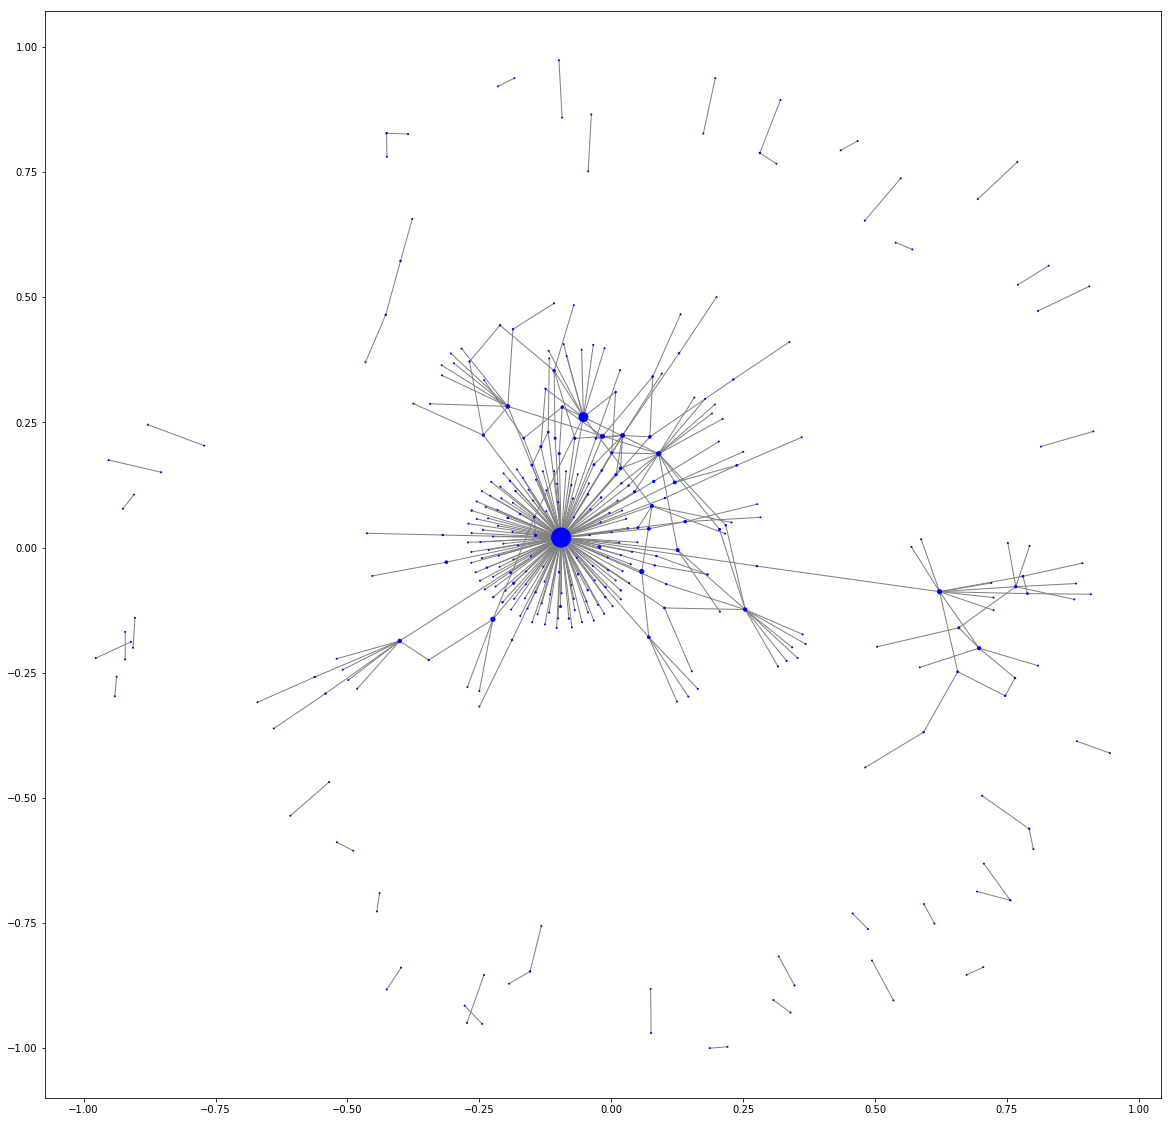

In [35]:
# Importing more libraries for network visualization
import networkx as nx
import nxviz as nv
from collections import Counter

# building an object "network" from networkx
G = nx.convert_matrix.from_pandas_edgelist(data_final, source='sender',\
                                           target='recipient',\
                                           edge_attr=None, create_using=None)

plt.figure(figsize=(20,20)) #Initializing the plot from matplotlib
pos = nx.spring_layout(G, k=.1) # Setting up the position

# Counting the importance of the node
nodes = list(G.nodes) 
nodes_tocount = list(data_final['sender']) + list(data_final['recipient'])
size_nodes = []

for i in nodes:
    size_nodes.append(nodes_tocount.count(i))

# Drawing the graph with NetworkX
nx.draw_networkx(G, pos, node_size = size_nodes*20,\
                 node_color='blue', with_labels=False,\
                 edge_color='grey')
plt.show()

In [36]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.005728133950209297


In [42]:
# Iterate to get informations on the network, changing the threshold
threshold_levels = [4,5,10,20,50,100]
densities = []
for t in threshold_levels:
    threshold_bolean = data_network['no_occ'] > t
    data_final = data_network[threshold_bolean]
    H = nx.convert_matrix.from_pandas_edgelist(data_final, source='sender',\
                                               target='recipient', edge_attr=None,\
                                               create_using=None)
    density = nx.density(H)
    densities.append(density)
    print("Threshold level:", t)
    print("Network density:", density)
    print('')

Threshold level: 4
Network density: 0.00040095153053509386

Threshold level: 5
Network density: 0.0004175987655688203

Threshold level: 10
Network density: 0.0004901186323940694

Threshold level: 20
Network density: 0.0006053781869383495

Threshold level: 50
Network density: 0.0008799482646748614

Threshold level: 100
Network density: 0.0011873678026279148



<function matplotlib.pyplot.show(*args, **kw)>

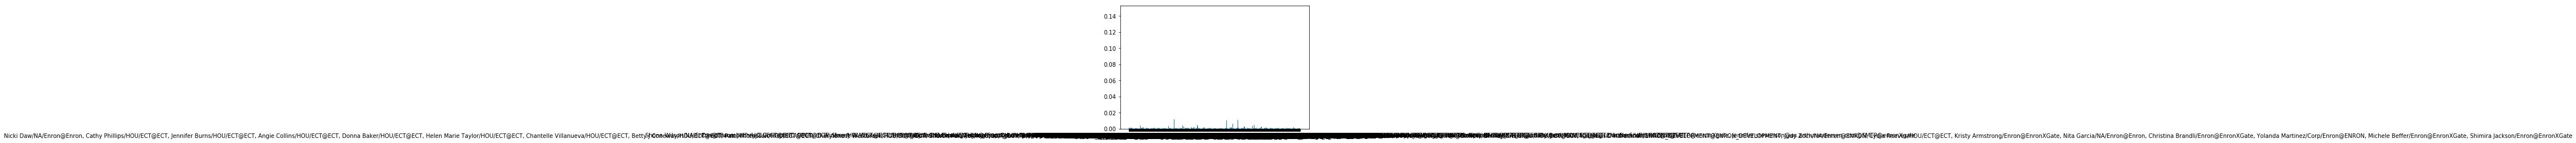

<Figure size 720x720 with 0 Axes>

In [38]:
# Network centrality
c = nx.degree_centrality(G)
vertices = []
centralities = []

for key, value in c.items():
    vertices.append(key)
    centralities.append(value)

cent_df = pd.DataFrame(list(zip(vertices, centralities)), columns = ['Name', 'Centrality'])
cent_df.sort_values(by='Centrality', ascending=False)


In [39]:
print(cent_df[:10])

                          Name  Centrality
0      phillip.allen@enron.com    0.072979
1   stagecoachmama@hotmail.com    0.000603
2          jsmith@austintx.com    0.001206
3  Phillip K Allen/HOU/ECT@ECT    0.001206
4       beth.perlman@enron.com    0.001206
5    phillip.k.allen@enron.com    0.001206
6      brian.hoskins@enron.com    0.006031
7        eric.benson@enron.com    0.000603
8    maryrichards7@hotmail.com    0.000603
9  <Phillip_K_Allen@enron.com>    0.000603


In [40]:
# Network betweenness centrality

bc = nx.betweenness_centrality(G)
vertices = []
centralities = []

for key, value in bc.items():
    vertices.append(key)
    centralities.append(value)

bcent_df = pd.DataFrame(list(zip(vertices, centralities)), columns = ['Name', 'B_Centrality'])
bcent_df.sort_values(by='B_Centrality', ascending=False)



Name  B_Centrality
505                                 eric.bass@enron.com      0.247435
1052                               sally.beck@enron.com      0.233759
300                       enron.announcements@enron.com      0.123661
195                               john.arnold@enron.com      0.110811
0                               phillip.allen@enron.com      0.106502
6                               brian.hoskins@enron.com      0.075652
945                              don.baughman@enron.com      0.042389
893                                 All Enron Worldwide      0.039709
491                               Eric Bass/HOU/ECT@ECT      0.037102
47                                steven.kean@enron.com      0.029448
526                                     ebass@enron.com      0.023299
1409                                      suew2@aol.com      0.021917
705                               all.houston@enron.com      0.021747
438                              susan.bailey@enron.com      0.021417
1411                                        Beck, Sally      0.021284
400                                      Gandy, Kristin      0.020250
236                                        Arnold, John      0.019602
240                          jeffrey.shankman@enron.com      0.019377
41                                    All Enron Houston      0.019276
247                                liz.taylor@enron.com      0.018560
1579                                 lcampbel@enron.com      0.017818
1067                             Sally Beck/HOU/ECT@ECT      0.017621
198                             John Arnold/HOU/ECT@ECT      0.017071
1078                             lexi.elliott@enron.com      0.016596
938                             kayne.coulter@enron.com      0.014206
753                                          Bass, Eric      0.014119
1047  david.delainey@enron.com, john.lavorato@enron....      0.012472
960                              chad.starnes@enron.com      0.011914
1054                           patti.thompson@enron.com      0.011377
1630                              mike.carson@enron.com      0.011122
...                                                 ...           ...
574   <Angelwgsx2@aol.com>, <alaska_turtles@yahoo.co...      0.000000
573   val.generes@ac.com, Eric Bass/HOU/ECT@ECT, Ran...      0.000000
572      Eric Bass/HOU/ECT@ECT, Patrick Scales/NA/Enron      0.000000
571   Timothy Blanchard/HOU/EES@EES, Matthew Lenhart...      0.000000
569   david.baumbach@enron.com, phillip.love@enron.c...      0.000000
568   David Baumbach/HOU/ECT@ECT, Phillip M Love/HOU...      0.000000
589                                     EBASS@ENRON.COM      0.000000
593           Amie J. Ahanchian <amie.ahanchian@ey.com>      0.000000
623   RWAnthony@mail.ngchla.org, beard_jennifer@yaho...      0.000000
598                       Timothy Blanchard/HOU/EES@EES      0.000000
622                           christa.winfrey@enron.com      0.000000
621   Eric Bass/HOU/ECT@ECT, David Baumbach/HOU/ECT@ECT      0.000000
620   lwbthemarine@bigplanet.com, daphneco64@bigplan...      0.000000
619   O'Neal D Winfree/HOU/ECT@ECT, Phillip M Love/H...      0.000000
618   Jason.Bass2@COMPAQ.com, Phillip M Love/HOU/ECT...      0.000000
617   Mark Frevert/NA/Enron@Enron, David W Delainey/...      0.000000
616                                  hrishelp@enron.com      0.000000
615                                   sap.coe@enron.com      0.000000
614   Pearce W Hammond/Corp/Enron@ENRON, James Simps...      0.000000
613   Eric Bass/HOU/ECT@ECT, Matthew Lenhart/HOU/ECT...      0.000000
610                                        RICHARD DARR      0.000000
609                        O'Neal D Winfree/HOU/ECT@ECT      0.000000
606                                 Eric.Bass@enron.com      0.000000
605                              phillip.love@enron.com      0.000000
604                          shelleyzee@mail.utexas.edu      0.000000
603                       kenneth.shulklapper@enron.com      

In [41]:
print(bcent_df[:10])

                          Name  B_Centrality
0      phillip.allen@enron.com      0.106502
1   stagecoachmama@hotmail.com      0.000000
2          jsmith@austintx.com      0.000000
3  Phillip K Allen/HOU/ECT@ECT      0.000860
4       beth.perlman@enron.com      0.000099
5    phillip.k.allen@enron.com      0.000000
6      brian.hoskins@enron.com      0.075652
7        eric.benson@enron.com      0.000000
8    maryrichards7@hotmail.com      0.000000
9  <Phillip_K_Allen@enron.com>      0.000000


Comments:

1) Due to the low computational power we face, we could not go above 50k mails. Therefore, there is a tradoff to do between chosing the mails randomly (then the network will not look like a real network) and high centrality of certain persons. In our case, we can see that phillip allen is highly central because his mails constitue the beginning of the list. In addition, the total of the emails is 1.6M, so 500k is not the whole dataset. 

We had the possibility to see how to build a network with networkX for visualization, but in order to conclude something about Enron, we would need the entire dataset. Nevertheless, the algorithm that we built could be applied to the whole dataset and give good metrics.